### Лабораторная работа 1

Перемножение матриц.

Матрицы хранятся в:
```
vector<vector<int>>
```

Исходные коды в прилагаемых файлах.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def parse_time_line(line):
    command, results = [x.strip() for x in line.split('|')]
    command = command.split()
    command = [command[0]] + [int(x) for x in command[1:]]
    results = [float(x) for x in results.split()]
    return command, results

#### Наивная версия

```
for i
    for j
        for k
            c[i][j] = a[i][k] * b[k][j]
```

In [3]:
with open('naive.txt', 'r') as f:
    lines = [parse_time_line(line) for line in f.readlines()]

In [4]:
xs = array([line[0][1] for line in lines])[::3]
ys_naive = np.min(array([line[1][0] for line in lines]).reshape((len(lines) // 3, 3)), axis=1)

In [5]:
xs_logs = stack((ones_like(xs), log(xs))).T
ys_naive_logs = log(ys_naive)

interp = linalg.lstsq(xs_logs, ys_naive_logs)[0]
ys_naive_interp = e ** (sum(xs_logs * interp, axis=1))
interp

array([-22.7945046 ,   3.44409094])

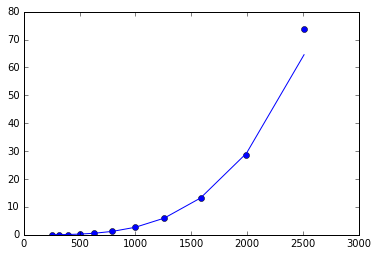

In [6]:
fig = figure()
ax = fig.add_subplot(111)
ax.plot(xs, ys_naive, 'bo')
ax.plot(xs, ys_naive_interp, 'b')

#### Параллельная версия
Параллелим по циклу i.
- Если параллелить по циклу i, ядра начинают портить друг другу кэш, происходит замедление.
- Если параллелить по k, нашу единственную операцию придется делать атомарной, и программа работает медленнее наивной в десятки раз.

In [7]:
with open('parallel.txt', 'r') as f:
    lines = [parse_time_line(line) for line in f.readlines()]

In [8]:
xs = array([line[0][1] for line in lines])[::3]
ys_parallel = np.min(array([line[1][0] for line in lines]).reshape((len(lines) // 3, 3)), axis=1)

In [9]:
xs_logs = stack((ones_like(xs), log(xs))).T
ys_parallel_logs = log(ys_parallel)

interp = linalg.lstsq(xs_logs, ys_parallel_logs)[0]
ys_parallel_interp = e ** (sum(xs_logs * interp, axis=1))
interp

array([-24.62023701,   3.62808196])

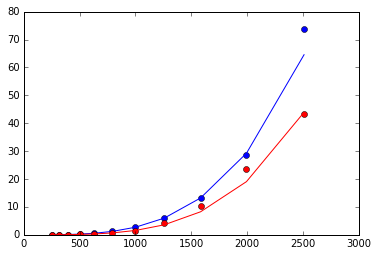

In [10]:
fig = figure()
ax = fig.add_subplot(111)
ax.plot(xs, ys_naive, 'bo')
ax.plot(xs, ys_naive_interp, 'b')
ax.plot(xs, ys_parallel, 'ro')
ax.plot(xs, ys_parallel_interp, 'r')

Cокращение времени работы

На компьютере 2 физических, 4 виртуальных ядра.

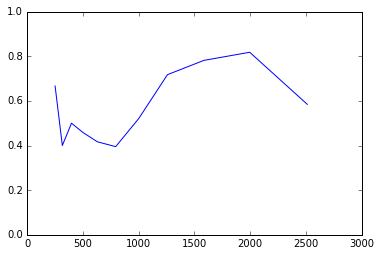

In [11]:
fig = figure()
ax = fig.add_subplot(111)
#ax.set_xscale("log")
#ax.set_yscale("log")
#ax.axis('equal')
ax.set_autoscaley_on(False)
ax.set_ybound(lower=0, upper=1)
ax.plot(xs, ys_parallel / ys_naive)

### Разбиение на блоки

Цикл по каждой переменной разбит на блоки (смотри код).
Для матриц размера 1000 подбирается оптимальный размер блока.

In [12]:
with open('blocky.txt', 'r') as f:
    lines = [parse_time_line(line) for line in f.readlines()]

In [13]:
bs = array([line[0][2] for line in lines])[::3]
ys_blocky_full = array([line[1][0] for line in lines]).reshape((len(lines) // 3, 3))
ys_blocky = np.min(ys_blocky_full, axis=1)

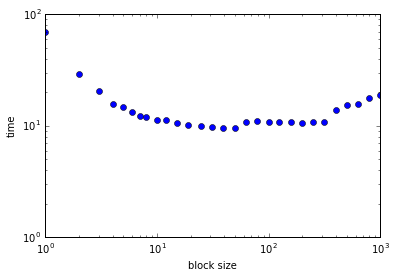

In [14]:
fig = figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax.axis('equal')
plt.xlabel('block size')
plt.ylabel('time')
ax.plot(bs, ys_blocky, 'bo')

Оптимальный размер блока --- 50.

#### Производительность при оптимальном размере блока.

In [15]:
with open('block-optimal.txt', 'r') as f:
    lines = [parse_time_line(line) for line in f.readlines()]

In [16]:
xs = array([line[0][1] for line in lines])[::3]
ys_blockopt = np.min(array([line[1][0] for line in lines]).reshape((len(lines) // 3, 3)), axis=1)

In [17]:
xs_logs = stack((ones_like(xs), log(xs))).T
ys_blockopt_logs = log(ys_blockopt)

interp = linalg.lstsq(xs_logs, ys_blockopt_logs)[0]
ys_blockopt_interp = e ** (sum(xs_logs * interp, axis=1))
interp

array([-20.52663121,   2.9996205 ])

In [18]:
ys_blockopt

array([  0.02,   0.04,   0.07,   0.15,   0.3 ,   0.61,   1.21,   2.53,
         4.81,   9.56,  19.25])

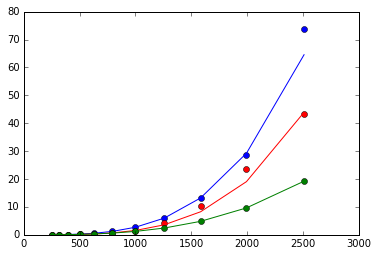

In [19]:
fig = figure()
ax = fig.add_subplot(111)
#ax.set_xscale("log")
#ax.set_yscale("log")
#ax.axis('equal')
ax.plot(xs, ys_naive, 'bo')
ax.plot(xs, ys_naive_interp, 'b')
ax.plot(xs, ys_parallel, 'ro')
ax.plot(xs, ys_parallel_interp, 'r')
ax.plot(xs, ys_blockopt, 'go')
ax.plot(xs, ys_blockopt_interp, 'g')

Ускорение:

0.26055766107200867

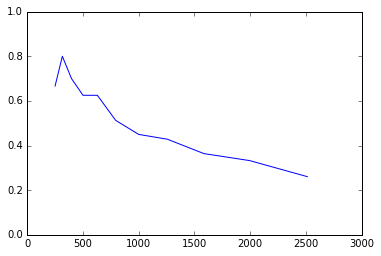

In [20]:
fig = figure()
ax = fig.add_subplot(111)
ax.set_autoscaley_on(False)
ax.set_ybound(lower=0, upper=1)
ax.plot(xs, ys_blockopt / ys_naive)
(ys_blockopt / ys_naive).min()

### Параллельная блочная версия.
Прирост производительности по сравнению с наивной реализацией.
Параллелим по внешнему циклу.

In [21]:
with open('fast.txt', 'r') as f:
    lines = [parse_time_line(line) for line in f.readlines()]

In [22]:
xs = array([line[0][1] for line in lines])[::3]
ys_fast = np.min(array([line[1][0] for line in lines]).reshape((len(lines) // 3, 3)), axis=1)

In [23]:
xs_logs = stack((ones_like(xs), log(xs))).T
ys_fast_logs = log(ys_fast)

interp = linalg.lstsq(xs_logs, ys_fast_logs)[0]
ys_fast_interp = e ** (sum(xs_logs * interp, axis=1))
interp

array([-21.90692785,   3.13273572])

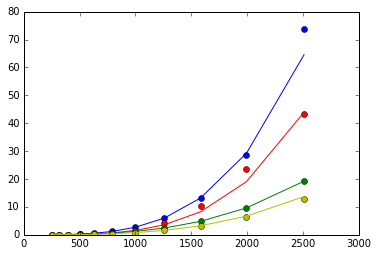

In [24]:
fig = figure()
ax = fig.add_subplot(111)
#ax.set_xscale("log")
#ax.set_yscale("log")
#ax.axis('equal')
ax.plot(xs, ys_naive, 'bo')
ax.plot(xs, ys_naive_interp, 'b')
ax.plot(xs, ys_parallel, 'ro')
ax.plot(xs, ys_parallel_interp, 'r')
ax.plot(xs, ys_blockopt, 'go')
ax.plot(xs, ys_blockopt_interp, 'g')
ax.plot(xs, ys_fast, 'yo')
ax.plot(xs, ys_fast_interp, 'y')

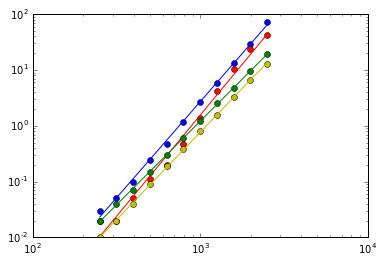

In [25]:
fig = figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
#ax.axis('equal')
ax.plot(xs, ys_naive, 'bo')
ax.plot(xs, ys_naive_interp, 'b')
ax.plot(xs, ys_parallel, 'ro')
ax.plot(xs, ys_parallel_interp, 'r')
ax.plot(xs, ys_blockopt, 'go')
ax.plot(xs, ys_blockopt_interp, 'g')
ax.plot(xs, ys_fast, 'yo')
ax.plot(xs, ys_fast_interp, 'y')

0.17514889009204115

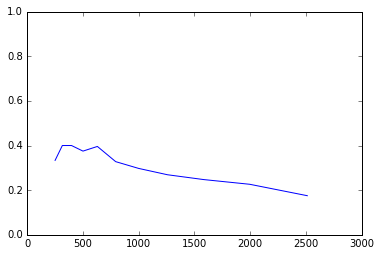

In [26]:
fig = figure()
ax = fig.add_subplot(111)
ax.set_autoscaley_on(False)
ax.set_ybound(lower=0, upper=1)
ax.plot(xs, ys_fast / ys_naive)
(ys_fast / ys_naive).min()

Максимальное ускорение в 5 раз на больших матрицах.